# Part 8: Combine Datasets

Combine the datasets and prepare training dataframes

In [14]:
import os
import sys
import datetime
from collections import defaultdict
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [15]:
from IPython.core.display import display, HTML
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 60em; }</style>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

In [16]:
data_dir = "./data"
data_files = [f for f in os.listdir(data_dir) if f.endswith("csv")]
print(data_files)

['google_trends.csv', 'tidy_fred.csv', 'umich_exp.csv', 'us_pau_claims.csv']


In [17]:
full_df = None
for f in data_files:
  print(f)
  df = pd.read_csv(os.path.join(data_dir, f))
  print(df[df.columns[:2]].tail(1))
  if full_df is None:
    full_df = df
  else:
    full_df = full_df.merge(df, on="date", how="outer", )
  print(full_df["date"].max())
full_df.sort_values(by="date", inplace=True)
full_df['date'] = pd.to_datetime(full_df['date'])
full_df.set_index("date", inplace=True)

google_trends.csv
           date  amazon jobs hiring
102  2021-05-02                  14
2021-05-02
tidy_fred.csv
           date  PAYEMS:Total Nonfarm
896  2021-05-01                   NaN
2021-05-02
umich_exp.csv
           date  Personal Finance Expected
158  2021-03-15                        118
2021-05-02
us_pau_claims.csv
          date  PUA IC
57  2021-05-08  101214
2021-05-08


In [18]:
full_df.sort_index(ascending=False, inplace=True)
full_df.head(2)
ycol = 'PAYEMS:Total Nonfarm'
cols = [full_df.columns[0], ycol]
display(full_df[cols].head(25))

,amazon jobs hiring,PAYEMS:Total Nonfarm
date,,
2021-05-08,NaN,NaN
2021-05-02,14.0,NaN
2021-05-01,NaN,NaN
2021-04-25,15.0,NaN
2021-04-24,NaN,NaN
2021-04-18,11.0,NaN
2021-04-17,NaN,NaN
2021-04-11,16.0,NaN
2021-04-10,NaN,NaN


In [19]:
# create predict frame
last_yval = None
rowdict = defaultdict(lambda: None)
rowdict[ycol] = None
rows = []
for i,(index, ser) in enumerate(full_df.iterrows()):
  if rowdict["index"] is None:
    rowdict['index'] = index
    
  if not np.isnan(ser[ycol]):
    rows.append(rowdict)
    # reset the rowdict
    rowdict = defaultdict(lambda: None)
    # and initialize the ycol
    rowdict[ycol] = ser[ycol]
    rowdict['index'] = index    
  for xcol in list(ser.index):
    if xcol == ycol:
      continue
    #print("--{0}, {1}--".format(xcol, ser[xcol]))
    if not np.isnan(ser[xcol]):
      if rowdict[xcol] is  None:     
        rowdict[xcol] = ser[xcol]
      


In [20]:
df = pd.DataFrame(rows)
df.set_index("index", inplace=True)
df.sort_index(inplace=True)
display(df.head(2))

,PAYEMS:Total Nonfarm,PUA IC,amazon jobs hiring,jobs hiring near me,indeed resume search,amazon jobs near me,job hiring near me,indeed resume,amazon jobs work from home,indeed employer resume search,...,NPPTTL: ADP,Personal Finance Expected,Business Condition 12 Months,Business Condition 5 Years,Expected Index,BSCICP03USM665S: OECD Business Confidence,CSCICP03USM665S: OECD US Consumer Confidence,JTS1000TSL: Total Separations: Total Private,JTS1000HIL: Hires: Total Private,JTS1000JOL: Job Openings: Total Private
index,,,,,,,,,,,,,,,,,,,,,
2007-02-01,137410.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,114461.0,NaN,NaN,NaN,NaN,99.502311,100.812638,4819.0,4878.0,4069.0
2007-03-01,137622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,114628.0,NaN,NaN,NaN,NaN,99.636106,100.528299,4916.0,5068.0,4332.0


In [31]:
temp_df = df.copy()
temp_df.tail(2)
temp_df.shape
temp_df = temp_df.loc[temp_df.index > '2010-06-01']
temp_df.ffill(inplace=True)
#temp_df.bfill(inplace=True)
display(temp_df.tail(3))
diff_df = temp_df.diff(1).copy()
diff_df.fillna(0, inplace=True)
display(diff_df.tail(4))

,PAYEMS:Total Nonfarm,PUA IC,amazon jobs hiring,jobs hiring near me,indeed resume search,amazon jobs near me,job hiring near me,indeed resume,amazon jobs work from home,indeed employer resume search,...,NPPTTL: ADP,Personal Finance Expected,Business Condition 12 Months,Business Condition 5 Years,Expected Index,BSCICP03USM665S: OECD Business Confidence,CSCICP03USM665S: OECD US Consumer Confidence,JTS1000TSL: Total Separations: Total Private,JTS1000HIL: Hires: Total Private,JTS1000JOL: Job Openings: Total Private
index,,,,,,,,,,,,,,,,,,,,,
2021-03-01,144120.0,428304.0,19.0,68.0,0.0,32.0,44.0,48.0,13.0,0.0,...,120373.714,118.0,83.0,82.0,70.7,102.508062,99.475607,5107.0,5446.0,6732.0
2021-04-01,144308.0,240401.0,10.0,57.0,22.0,28.0,53.0,40.0,9.0,0.0,...,121167.752,118.0,108.0,94.0,79.7,102.508062,99.475607,5107.0,5446.0,6732.0
2021-05-08,144308.0,101214.0,14.0,64.0,22.0,31.0,57.0,50.0,14.0,58.0,...,121167.752,118.0,108.0,94.0,79.7,102.508062,99.475607,5107.0,5446.0,6732.0


,PAYEMS:Total Nonfarm,PUA IC,amazon jobs hiring,jobs hiring near me,indeed resume search,amazon jobs near me,job hiring near me,indeed resume,amazon jobs work from home,indeed employer resume search,...,NPPTTL: ADP,Personal Finance Expected,Business Condition 12 Months,Business Condition 5 Years,Expected Index,BSCICP03USM665S: OECD Business Confidence,CSCICP03USM665S: OECD US Consumer Confidence,JTS1000TSL: Total Separations: Total Private,JTS1000HIL: Hires: Total Private,JTS1000JOL: Job Openings: Total Private
index,,,,,,,,,,,,,,,,,,,,,
2021-02-01,417.0,33597.0,6.0,1.0,-2.0,1.0,7.0,16.0,-9.0,56.0,...,-12.352,-1.0,11.0,-12.0,-0.6,-0.614036,-0.371987,124.0,481.0,496.0
2021-03-01,1072.0,84247.0,-6.0,-5.0,-21.0,2.0,-24.0,10.0,1.0,-56.0,...,577.808,-3.0,-4.0,-6.0,-3.3,1.707898,0.799894,0.0,0.0,0.0
2021-04-01,188.0,-187903.0,-9.0,-11.0,22.0,-4.0,9.0,-8.0,-4.0,0.0,...,794.038,0.0,25.0,12.0,9.0,0.000000,0.000000,0.0,0.0,0.0
2021-05-08,0.0,-139187.0,4.0,7.0,0.0,3.0,4.0,10.0,5.0,58.0,...,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [9]:
N = diff_df.shape[0]
trainN = int(N*.95)

testN = N - trainN
print(trainN, testN)
train_df = diff_df.iloc[:trainN]
test_df = diff_df.iloc[trainN:]

124 7


In [10]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
ycol = "PAYEMS:Total Nonfarm"
Xtrain = train_df.drop(ycol, axis=1)
ytrain = train_df[ycol]
 
rf = RandomForestRegressor(max_depth=4, random_state=0)
lr = LinearRegression().fit(Xtrain, ytrain)
en = regr = ElasticNet(random_state=0)

mod = en
mod.fit(Xtrain, ytrain)
ytrain_hat = mod.predict(Xtrain)

Xtest = test_df.drop(ycol, axis=1)
ytest = test_df[ycol]
ytest_hat = mod.predict(Xtest)


C:\Users\jmull\Anaconda3\envs\payems\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112253.7557246302, tolerance: 46865.29669919356
  model = cd_fast.enet_coordinate_descent(


In [34]:
mod.coef_[:10]

array([-1.90519067e-03,  1.39586468e-03,  1.42151549e-01,  1.24555527e+00,
        4.67027980e-01, -8.23276045e-01,  2.85069090e+00, -8.97729261e-01,
        4.11804637e+00, -7.29678332e-01])

<AxesSubplot:xlabel='index'>

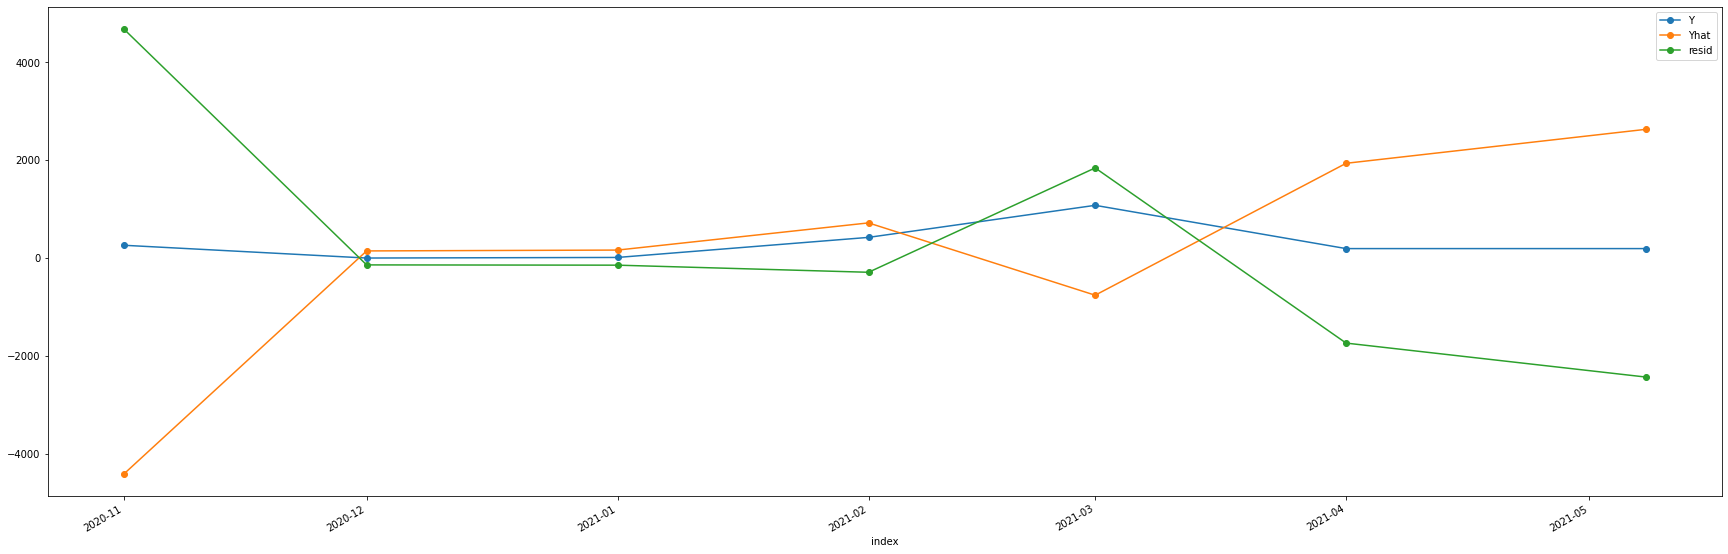

In [35]:
pdf = pd.DataFrame(data = {"Y":ytest, "Yhat":ytest_hat}, index=test_df.index)
pdf['resid'] = pdf['Y'] - pdf['Yhat']
pdf.plot(figsize = [30,10], marker = 'o')

AxesSubplot(0.125,0.125;0.775x0.755)


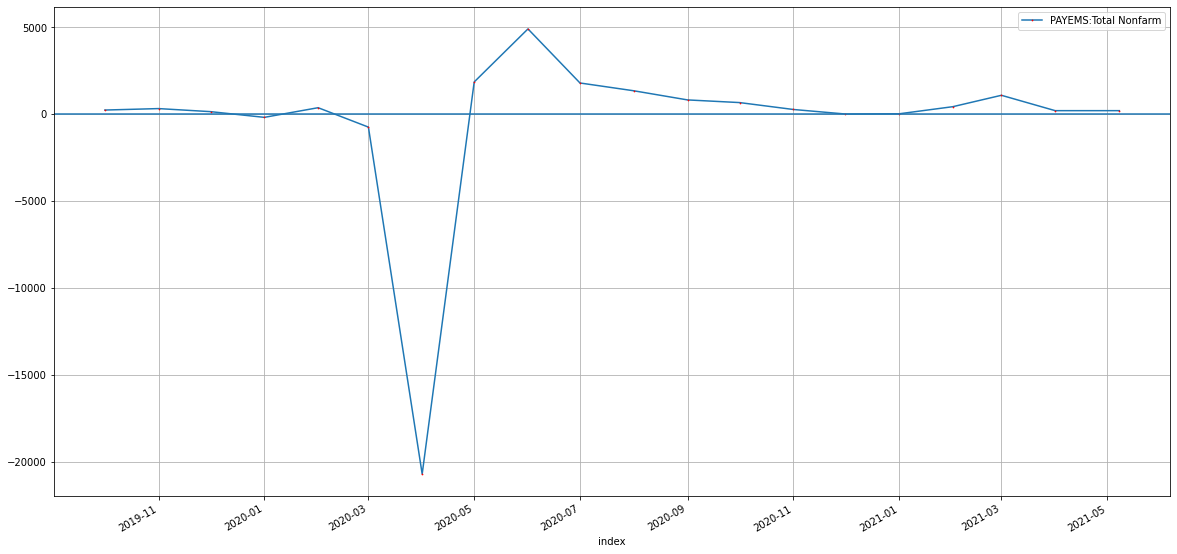

In [36]:
nrows=1
ncols=1
figwd=20
fight=10
sharex=True
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=[figwd, fight], sharex=sharex)
print(axs)
ax = axs
diff_df.tail(20).reset_index().plot(ax=ax, x="index", y="PAYEMS:Total Nonfarm", figsize=[20,10], marker='o',
                          mec='red', mfc='black', ms=0.75, grid=True)
ax.axhline(y=0)

(15, 3)


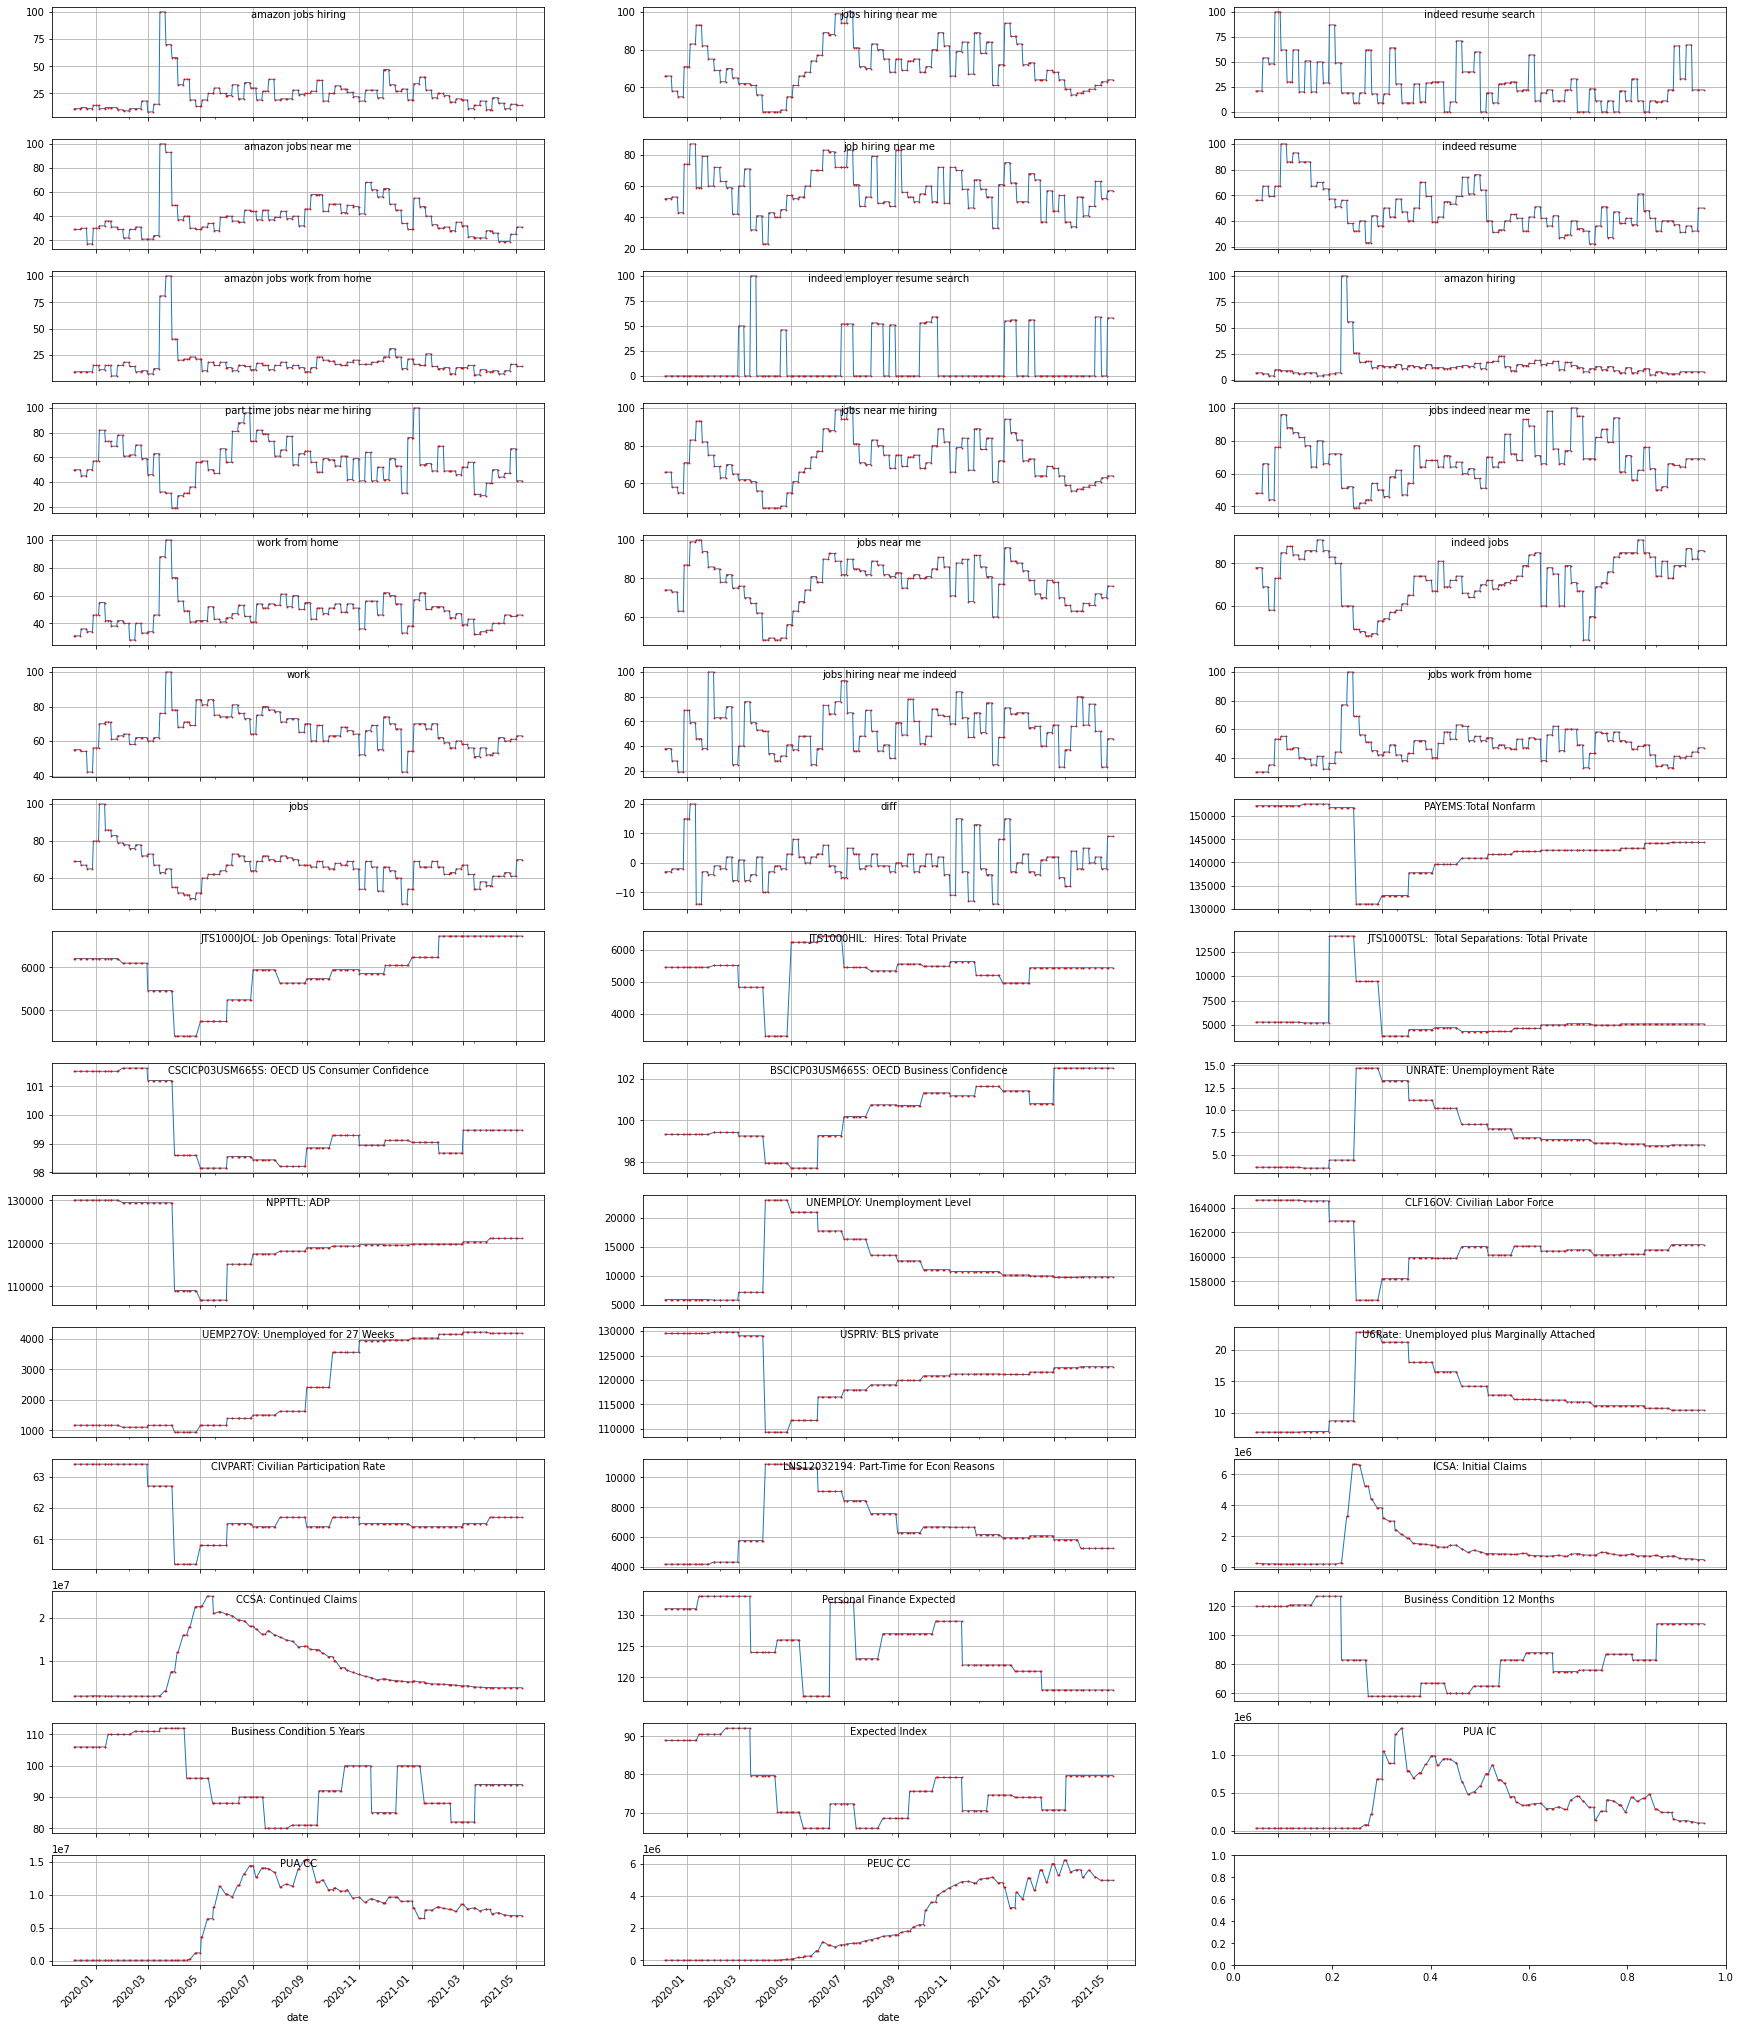

In [38]:
xcol = "date"
title = "title"
temp_df = full_df.loc[full_df.index > '2019-12-01'].copy()
temp_df.bfill(inplace=True)
temp_df.ffill(inplace=True)
temp_df.fillna(0, inplace=True)
temp_df.reset_index(inplace=True)

ycols = [c for c in temp_df.columns if c != "date"]

sharex = False
ncols=3
figwd=30
fight=40
xtick_rot = 45
ylim=(None, None)
nrows = int(np.ceil(len(ycols)/float(ncols)))
fig = None
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=[figwd, fight], sharex=sharex)  
print(axs.shape)
for i, ycol in enumerate(ycols):
  if ycol == "date":
    continue
  row = i // ncols
  col = i % ncols
  ax = axs[row][col]  
  #print(ycol)
  temp_df.plot(ax=ax, kind='line', x=xcol, y=ycol,linestyle='-', marker='o', lw=1, ylim=ylim,
                   mec='red', mfc='black', ms=0.85,  title=None, legend=None, label=None, grid=True, sharex=True)

  ax.text(.5,.9, ycol,
        horizontalalignment='center',
        transform=ax.transAxes)  
    
  ax.xaxis.set_tick_params(rotation=xtick_rot)     

plt.show()